<center><img src = "https://blog.mensajerosurbanos.com/hubfs/Logo%20nuevo%20MU-1%20(1)-1.png" alt = "Logomensajerosurbanos" width = "75%">  </img></center>

# **Workspace preparation**

In [ ]:
# Colab Connection
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sns
import math
import datetime
import folium 
from folium.plugins import HeatMap
from tabulate import tabulate
import statsmodels.api as sm
from scipy import stats
%matplotlib inline  

In [ ]:
# Applying Function 1
def count_plot(df_plot: pd.DataFrame, COL_NAME:str, TITLE:str, X_LABEL:str, Y_LABEL:str):
    ax = plt.figure()
    ax = sns.countplot(x=COL_NAME, data=df_plot)
    ax.set_title(TITLE)
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(Y_LABEL)
    return ax

In [ ]:
# Applying Function 2
def plot_data_distribution(vars_plot):
    n = len(vars_plot)
    i = 0

    fig, ax = plt.subplots(n, 1, figsize=(10,4*n))

    for var_plot in vars_plot:
        plot_var = df2[var_plot].values
        sns.distplot(plot_var, ax=ax[i])
        ax[i].set_title(var_plot, fontsize=14)
        ax[i].set_xlim([min(plot_var), max(plot_var)])
        i+=1
    plt.show()

In [ ]:
# Applying Function 3
def pretty_print(df_print):
    print(tabulate(df_print, headers='keys', tablefmt='psql'))

# **Dataframe Load**

In [ ]:
# Uploading the original dataframe
path_file = "/content/drive/MyDrive/CorrelationOneProyect/4.2.FinalFE/dataset199xl.xlsx"
df = pd.read_excel(path_file)
df.head() # DataFrame view

,id_servicio,fecha_inicio,hora_inicio,id_resource,vehiculo,vip,id_cliente,cliente,segmento,tipo_pago,...,no_paradas,finalizado_fallido,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente,cumplimiento_promesa,industry,client type
0,95183116.0,2021-07-26,21,69088.0,Motocicleta,No VIP,4idc,4cl,B2B,Datafono,...,2,NaN,1.982680e+08,NaN,NaN,NaN,NaN,0.0,Ind5,1
1,95222788.0,2021-07-26,21,69088.0,Motocicleta,No VIP,4idc,4cl,B2B,Datafono,...,2,NaN,1.932000e+16,4.059720e-01,NaN,NaN,NaN,0.0,Ind5,1
2,95272956.0,2021-07-26,17,1923848.0,Motocicleta,VIP Total,5idc,5cl,B2B,Efectivo,...,2,NaN,2.240280e-01,5.558028e+15,NaN,NaN,NaN,0.0,Ind2,1
3,95278016.0,2021-07-26,21,69088.0,Motocicleta,No VIP,4idc,4cl,B2B,Datafono,...,2,1.0,1.176000e+03,2.100000e-01,7.503972e+15,3.78,12669972.0,1.0,Ind5,1
4,95288536.0,2021-07-26,8,1510148.0,Bicicleta,VIP Total,7idc,7cl,B2C,Efectivo,...,2,1.0,3.080280e-01,6.636000e+03,7.560000e+00,13089972.00,27594.0,1.0,Ind6,1


In [ ]:
# Dataframe size
df.shape

(608001, 42)

In [ ]:
# Features types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608001 entries, 0 to 608000
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_servicio           608001 non-null  float64       
 1   fecha_inicio          608001 non-null  datetime64[ns]
 2   hora_inicio           608001 non-null  int64         
 3   id_resource           608001 non-null  float64       
 4   vehiculo              608001 non-null  object        
 5   vip                   608001 non-null  object        
 6   id_cliente            608001 non-null  object        
 7   cliente               608001 non-null  object        
 8   segmento              608001 non-null  object        
 9   tipo_pago             608001 non-null  object        
 10  ciudad                608001 non-null  object        
 11  microzona             608001 non-null  object        
 12  lat                   608001 non-null  float64       
 13 

# **Settling variable names and variables types**

In [ ]:
# Rename columns with lower case
df.columns= df.columns.str.lower()
df.columns

Index(['id_servicio', 'fecha_inicio', 'hora_inicio', 'id_resource', 'vehiculo',
       'vip', 'id_cliente', 'cliente', 'segmento', 'tipo_pago', 'ciudad',
       'microzona', 'lat', 'long', 'address', 'lat_2', 'long_2', 'ida_vuelta',
       'valor_total', 'valor_base', 'recargo_ida_vuelta', 'recargo_paradas',
       'recargo_distancia', 'recargo_tiempo', 'night_surcharge',
       'recargo_seguro', 'valor_descuento', 'parking_surcharge',
       'valor_declarado', 'distancia', 'estado', 'tipo_cancelado',
       'no_paradas', 'finalizado_fallido', 'tiempo_asignacion',
       'tiempo_recogida', 'tiempo_punto', 'tiempo_entrega', 'tiempo_cliente',
       'cumplimiento_promesa', 'industry', 'client type'],
      dtype='object')

In [ ]:
# Change feature types
dtype_convert = {'id_servicio': 'object',
                 'fecha_inicio': 'object',
                 'hora_inicio': 'int',
                 'id_resource': 'object',
                 'vehiculo': 'category',
                 'vip':  'category',
                 'id_cliente': 'object',
                 'cliente':'object',
                 'segmento':'category',
                 'tipo_pago':'category',
                 'ciudad':'category',
                 'microzona':'category',
                 'lat':'float',
                 'long':'float',
                 'address':'object',
                 'lat_2':'float',
                 'long_2':'float',
                 'ida_vuelta':'bool',
                 'valor_total':'float',
                 'valor_base':'float',
                 'recargo_ida_vuelta':'float',
                 'recargo_paradas':'float',
                 'recargo_distancia':'float',
                 'recargo_tiempo':'float',
                 'night_surcharge':'float',
                 'recargo_seguro':'float',
                 'valor_descuento':'float',
                 'parking_surcharge':'float',
                 'valor_declarado':'float',
                 'distancia':'float',
                 'estado':'category',
                 'tipo_cancelado':'category',
                 'no_paradas':'float',
                 'finalizado_fallido':'category',
                 'tiempo_asignacion':'float',
                 'tiempo_recogida':'float',
                 'tiempo_punto':'float',
                 'tiempo_entrega':'float',
                 'tiempo_cliente':'float',
                 'cumplimiento_promesa':'category',
                 'industry':'category',
                 'client type':'category'}

df2= df.astype(dtype_convert)

# Change date feature
df2["fecha_inicio"] = pd.to_datetime(df2["fecha_inicio"],  format="%Y-%m-%d")

# Print
df2.dtypes

id_servicio                     object
fecha_inicio            datetime64[ns]
hora_inicio                      int64
id_resource                     object
vehiculo                      category
vip                           category
id_cliente                      object
cliente                         object
segmento                      category
tipo_pago                     category
ciudad                        category
microzona                     category
lat                            float64
long                           float64
address                         object
lat_2                          float64
long_2                         float64
ida_vuelta                        bool
valor_total                    float64
valor_base                     float64
recargo_ida_vuelta             float64
recargo_paradas                float64
recargo_distancia              float64
recargo_tiempo                 float64
night_surcharge                float64
recargo_seguro           

# **Descriptives**

In [ ]:
# Statistical summary
df2.drop(['lat','long','lat_2','long_2'], axis = 1).describe()

,hora_inicio,valor_total,valor_base,recargo_ida_vuelta,recargo_paradas,recargo_distancia,recargo_tiempo,night_surcharge,recargo_seguro,valor_descuento,parking_surcharge,valor_declarado,distancia,no_paradas,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente
count,608001.000000,6.080010e+05,608001.000000,608001.000000,608001.000000,608001.000000,608001.000000,608001.000000,6.080010e+05,6.080010e+05,608001.000000,6.080010e+05,6.080010e+05,608001.000000,6.080010e+05,5.986170e+05,5.858510e+05,5.764460e+05,5.764460e+05
mean,13.797354,2.128641e+15,7031.935677,1084.691862,353.747658,3515.890714,22.154193,140.242775,2.430913e+15,6.493811e+11,157.919372,7.046086e+14,8.771036e+13,2.274912,1.877401e+15,4.805124e+15,6.011004e+15,6.591618e+15,7.881629e+15
std,4.190136,8.501827e+15,732.938795,3077.080227,2759.355820,7453.039766,415.700131,347.543440,8.556861e+15,8.249966e+13,673.834216,4.556490e+15,1.350522e+15,0.523265,7.450317e+15,1.307612e+16,1.347247e+16,1.340243e+16,1.418701e+16
min,0.000000,0.000000e+00,4231.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-6.133403e+16,-7.910028e+16,-7.910028e+16,1.400280e-01
25%,11.000000,8.106500e+03,6665.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.650000e+04,1.680000e+00,2.000000,2.240280e-01,4.340280e-01,7.602000e+03,6.837600e+04,8.540028e+06
50%,14.000000,1.441500e+04,6742.500000,0.000000,0.000000,1116.000000,0.000000,0.000000,2.408700e+02,0.000000e+00,0.000000,9.300000e+04,3.360000e+00,2.000000,5.460000e-01,1.820028e+06,4.731972e+06,1.408403e+07,3.030997e+07
75%,17.000000,1.485157e+07,6897.500000,0.000000,0.000000,5270.000000,0.000000,0.000000,1.852250e+05,0.000000e+00,0.000000,1.768395e+05,6.720000e+00,3.000000,9.206400e+04,1.051403e+07,5.445972e+15,8.049972e+15,1.255800e+16
max,23.000000,8.191704e+16,9765.000000,100750.000000,271482.500000,537850.000000,44268.000000,1395.000000,8.143855e+16,1.805766e+16,11625.000000,7.920500e+16,6.384000e+16,33.000000,7.980000e+16,7.980000e+16,7.980000e+16,7.980000e+16,7.980000e+16


In [ ]:
# Categorical features in a list
categorical_columns = df2.columns[df2.dtypes == 'category'].to_list()
categorical_columns

['vehiculo',
 'vip',
 'segmento',
 'tipo_pago',
 'ciudad',
 'microzona',
 'estado',
 'tipo_cancelado',
 'finalizado_fallido',
 'cumplimiento_promesa',
 'industry',
 'client type']

In [ ]:
# View of categories in categorical features:
for col in categorical_columns:
    print("Cateogires in '{}': {}".format(col, df[col].unique()))

Cateogires in 'vehiculo': ['Motocicleta' 'Bicicleta' 'Van' 'Automovil/Van/Camioneta']
Cateogires in 'vip': ['No VIP' 'VIP Total' 'VIP Mensajeria' 'VIP Domicilios']
Cateogires in 'segmento': ['B2B' 'B2C']
Cateogires in 'tipo_pago': ['Datafono' 'Efectivo' 'Pago on-line' 'Mixto']
Cateogires in 'ciudad': ['Amd' 'Amb' 'Ami' 'Amg' 'Amh' 'Ama' 'Amf' 'Ame' 'Amj' 'Amc' 'Amk' 'Aml'
 'Amm' 'Amn']
Cateogires in 'microzona': ['4mz' '5mz' '7mz' '8mz' '2mz' '9mz' '10mz' '11mz' '12mz' '1mz' '14mz'
 '15mz' '3mz' '16mz' '17mz' '18mz' '19mz' '20mz' '21mz' '22mz' '23mz'
 '0mz' '24mz' '25mz' '26mz' '6mz' '27mz' '28mz' '29mz' '13mz' '30mz'
 '31mz' '32mz' '33mz' '35mz' '34mz' '36mz' '37mz' '38mz' '39mz' '40mz'
 '41mz' '42mz' '43mz' '44mz' '46mz' '47mz' '48mz' '49mz' '45mz' '50mz'
 '51mz' '52mz' '53mz' '54mz' '55mz' '56mz' '57mz' '58mz' '59mz' '60mz'
 '61mz' '62mz' '63mz' '64mz' '65mz' '66mz' '67mz' '68mz']
Cateogires in 'estado': ['Cancelado' 'Finalizado']
Cateogires in 'tipo_cancelado': ['C4' nan 'C5' 'C6' 

In [ ]:
# View of categories distribution:
df_ = df2.copy()
for col_name in categorical_columns:
    df_print = pd.DataFrame(round(df_[col_name].value_counts(normalize=True)*100))
    df_print.columns = [" '{}' distribution %".format(col_name)]
    pretty_print(df_print)

+-------------------------+------------------------------+
|                         |    'vehiculo' distribution % |
|-------------------------+------------------------------|
| Motocicleta             |                           66 |
| Bicicleta               |                           34 |
| Automovil/Van/Camioneta |                            0 |
| Van                     |                            0 |
+-------------------------+------------------------------+
+----------------+-------------------------+
|                |    'vip' distribution % |
|----------------+-------------------------|
| No VIP         |                      60 |
| VIP Total      |                      37 |
| VIP Domicilios |                       1 |
| VIP Mensajeria |                       1 |
+----------------+-------------------------+
+-----+------------------------------+
|     |    'segmento' distribution % |
|-----+------------------------------|
| B2B |                           91 |
| B2C |     

## **Missing values**

In [ ]:
# Missing values in percentage:
missing = round(df2.isnull().sum()/df2.shape[0],4)*100
missing.sort_values(ascending = False)

tipo_cancelado          96.66
tiempo_cliente           5.19
tiempo_entrega           5.19
tiempo_punto             3.64
finalizado_fallido       3.64
tiempo_recogida          1.54
id_servicio              0.00
valor_declarado          0.00
recargo_tiempo           0.00
night_surcharge          0.00
recargo_seguro           0.00
valor_descuento          0.00
parking_surcharge        0.00
no_paradas               0.00
distancia                0.00
estado                   0.00
fecha_inicio             0.00
tiempo_asignacion        0.00
cumplimiento_promesa     0.00
industry                 0.00
recargo_distancia        0.00
recargo_paradas          0.00
recargo_ida_vuelta       0.00
valor_base               0.00
hora_inicio              0.00
id_resource              0.00
vehiculo                 0.00
vip                      0.00
id_cliente               0.00
cliente                  0.00
segmento                 0.00
tipo_pago                0.00
ciudad                   0.00
microzona 

For features with less than 6% null, we apply two strategies, fill them with mean for numeric features and with mode for categorical features
 
The feature with 96% null will be deleted from the dataframe

In [ ]:
# Fill null values according to the feature type
df2["tiempo_cliente"]= df2["tiempo_cliente"].fillna(df2["tiempo_cliente"].mean())
df2["tiempo_entrega"] = df2["tiempo_entrega"].fillna(df2["tiempo_entrega"].mean())
df2["tiempo_punto"] = df2["tiempo_punto"].fillna(df2["tiempo_punto"].mean())
df2["finalizado_fallido"] = df2["finalizado_fallido"].fillna(df2["finalizado_fallido"].mode().values[0])
df2["tiempo_recogida"] = df2["tiempo_recogida"].fillna(df2["tiempo_recogida"].mean())

df2.isnull().sum()

id_servicio                  0
fecha_inicio                 0
hora_inicio                  0
id_resource                  0
vehiculo                     0
vip                          0
id_cliente                   0
cliente                      0
segmento                     0
tipo_pago                    0
ciudad                       0
microzona                    0
lat                          0
long                         0
address                      0
lat_2                        0
long_2                       0
ida_vuelta                   0
valor_total                  0
valor_base                   0
recargo_ida_vuelta           0
recargo_paradas              0
recargo_distancia            0
recargo_tiempo               0
night_surcharge              0
recargo_seguro               0
valor_descuento              0
parking_surcharge            0
valor_declarado              0
distancia                    0
estado                       0
tipo_cancelado          587705
no_parad

## **Descriptive Graphs**

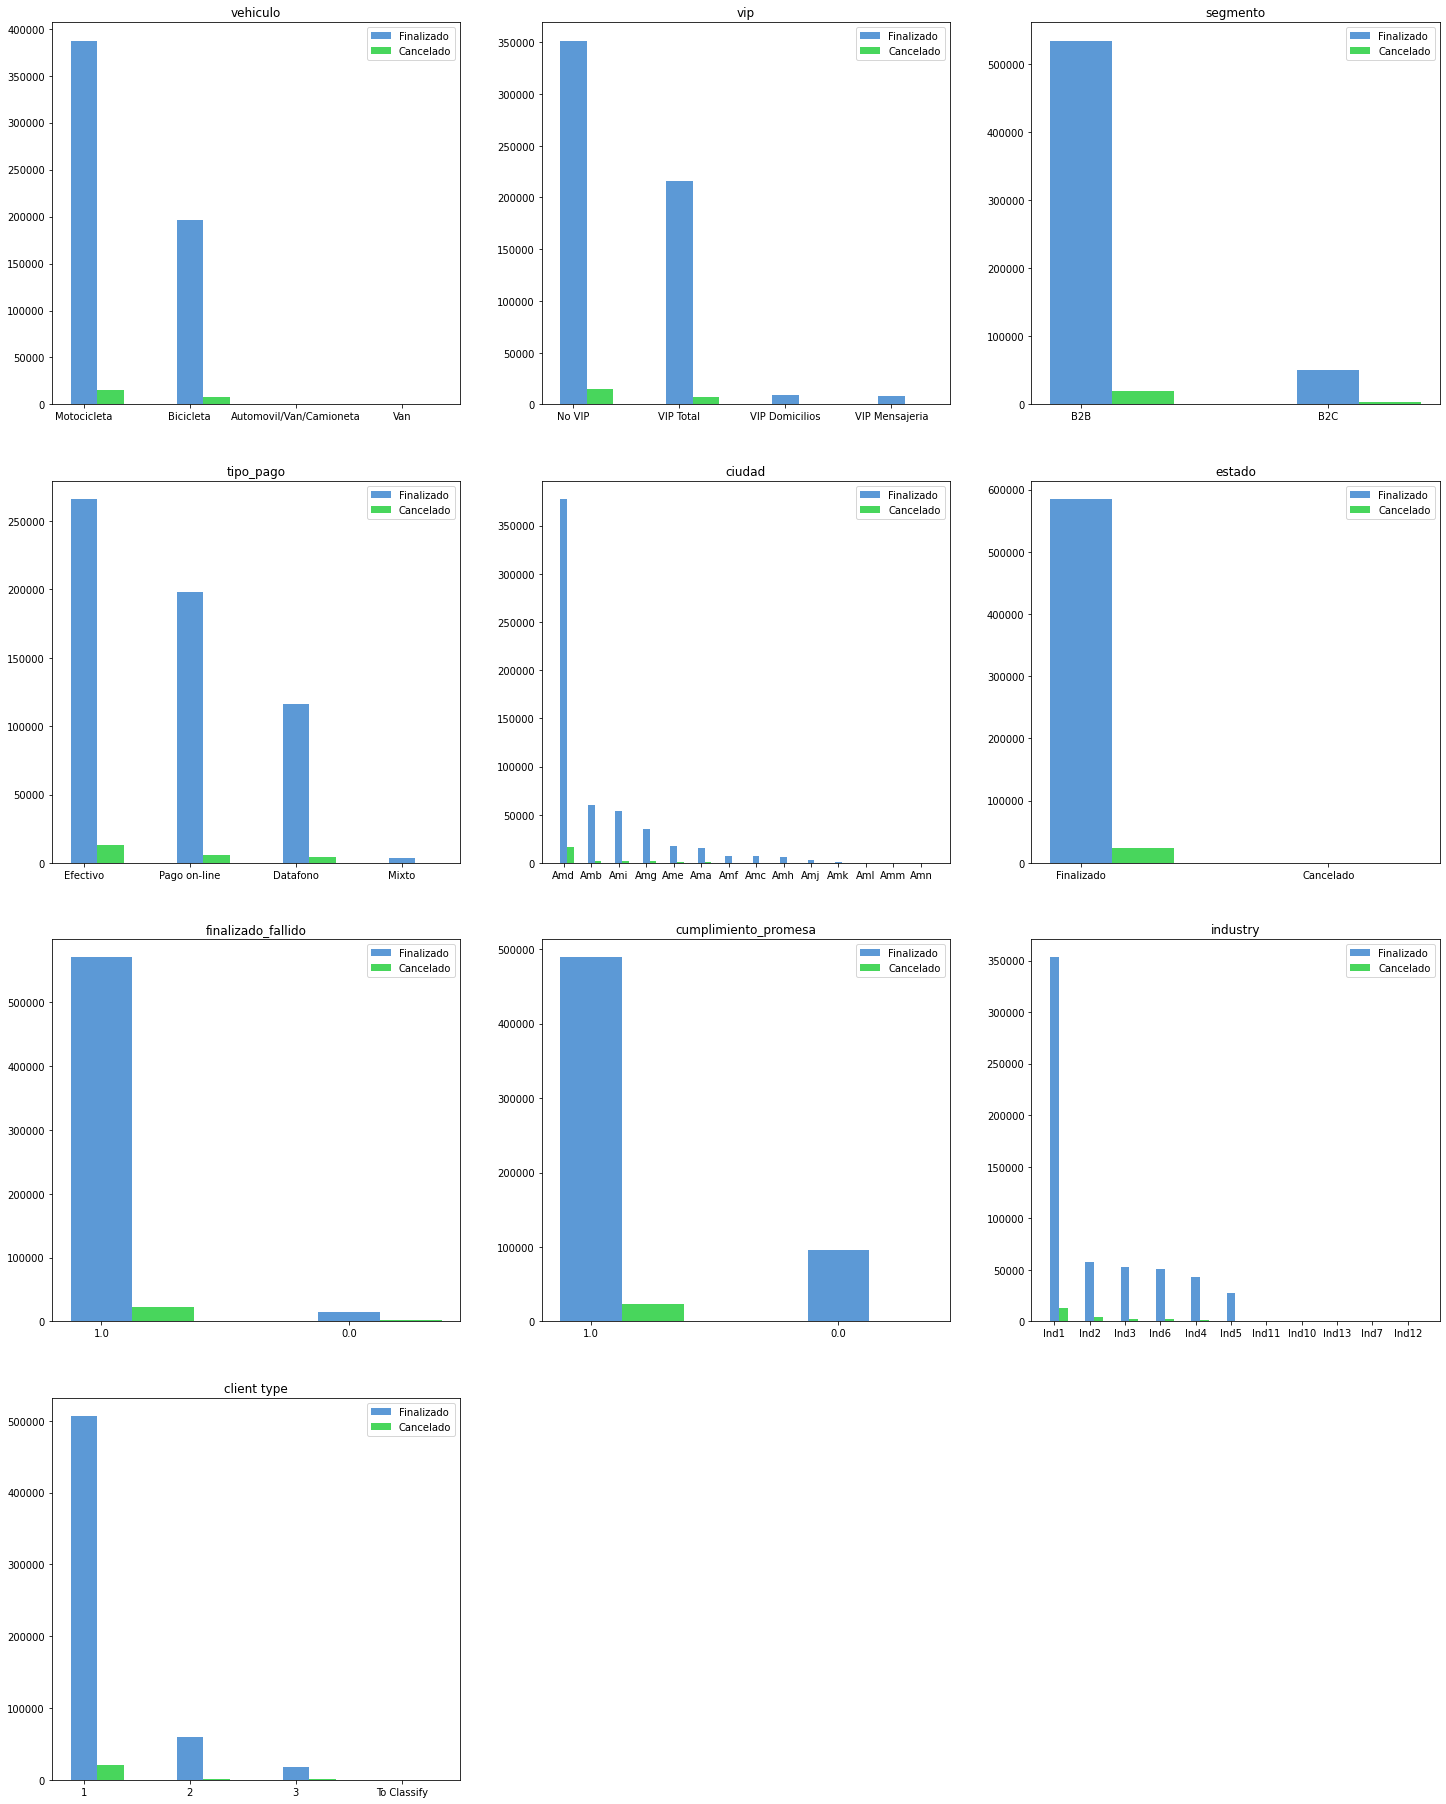

In [ ]:
# Define initial information
barWidth = 0.25
fig = plt.subplots(figsize =(20,25))
categorical_columns = df2.columns[df2.dtypes == 'category'].to_list()
categorical_columns.pop(5)
categorical_columns.pop(6)

plt.tight_layout()

# Function to create many plots in one:
for i,j in zip(categorical_columns,range(12)):
    
    plt.subplot(4, 3, j+1)
    
    # "finalizado" category for "estado" feature
    height1 = df2[df2['estado']=='Finalizado'][i].value_counts().values
    bars1 = df2[df2['estado']== 'Finalizado'][i].value_counts().index
    y_pos1 = np.arange(len(bars1))

    # "cancelado" category for "estado" feature
    height2 = df2[df2['estado']=='Cancelado'][i].value_counts().values
    bars2 = df2[df2['estado']== 'Cancelado'][i].value_counts().index
    y_pos2 = [x + barWidth for x in  y_pos1]


    # Create bars for "finalizado"
    plt.bar(y_pos1, height1, color=(0.2, 0.5, 0.8, 0.8), width = barWidth,
            edgecolor ='None', label ='Finalizado')
    
    # Create bars for "Cancelado"
    plt.bar(y_pos2, height2, color =(0.1, 0.8, 0.2, 0.8), width = barWidth,
            edgecolor ='None', label ='Cancelado')
    
    
    # Create legends
    plt.xticks(y_pos1, bars1, fontsize = 10)

    # Change rotation x-ticks
    plt.xticks(rotation=0)

    # Show legend
    plt.legend()

    # Define Title
    plt.title(i)


Most services are performed by motorcycle or bicycle and come from industry Ind1. Users usually do not have a VIP account, they are client type 1, they pay in cash and are located in B2B segment of the Amd microzone.

There is an evident highlighting in the low percentage of canceled services.

In [ ]:
# Normality test for df2
st1 = stats.shapiro(df2.valor_total)
st2 = stats.shapiro(df2.valor_base)
st3 = stats.shapiro(df2.recargo_ida_vuelta)
st4 = stats.shapiro(df2.recargo_distancia)
st5 = stats.shapiro(df2.recargo_tiempo)
st6 = stats.shapiro(df2.night_surcharge)
st7 = stats.shapiro(df2.recargo_seguro)
st8 = stats.shapiro(df2.valor_descuento)
st9 = stats.shapiro(df2.parking_surcharge)
st10 = stats.shapiro(df2.valor_declarado)
st11 = stats.shapiro(df2.distancia)
st12 = stats.shapiro(df2.no_paradas)
st13 = stats.shapiro(df2.tiempo_asignacion)
st14 = stats.shapiro(df2.tiempo_recogida)
st15 = stats.shapiro(df2.tiempo_punto)
st16 = stats.shapiro(df2.tiempo_entrega)
st17 = stats.shapiro(df2.tiempo_cliente)

print(f"Variables normality test values:{st1},{st2},{st3},{st4},{st5},{st6},{st7},{st8},{st9},{st10},{st11},{st12},{st13},{st14},{st15},{st16},{st17}")

Variables normality test values:(0.2646713852882385, 0.0),(0.64299476146698, 0.0),(0.40791988372802734, 0.0),(0.42342060804367065, 0.0),(0.028071045875549316, 0.0),(0.447759747505188, 0.0),(0.32068121433258057, 0.0),(0.0010452866554260254, 0.0),(0.24976122379302979, 0.0),(0.14420801401138306, 0.0),(0.03770250082015991, 0.0),(0.48769229650497437, 0.0),(0.2776985168457031, 0.0),(0.4292711615562439, 0.0),(0.5286269187927246, 0.0),(0.5806618928909302, 0.0),(0.6441741585731506, 0.0)


In [ ]:
# Define dictionary for colors
sns.color_palette("gist_rainbow")
PROPS = {
    'boxprops':{'edgecolor':'gray'},
    'medianprops':{'color':'gray'},
    'whiskerprops':{'color':'gray'},
    'capprops':{'color':'gray'}
}

Text(0.5, 1.0, 'tiempo_entrega')

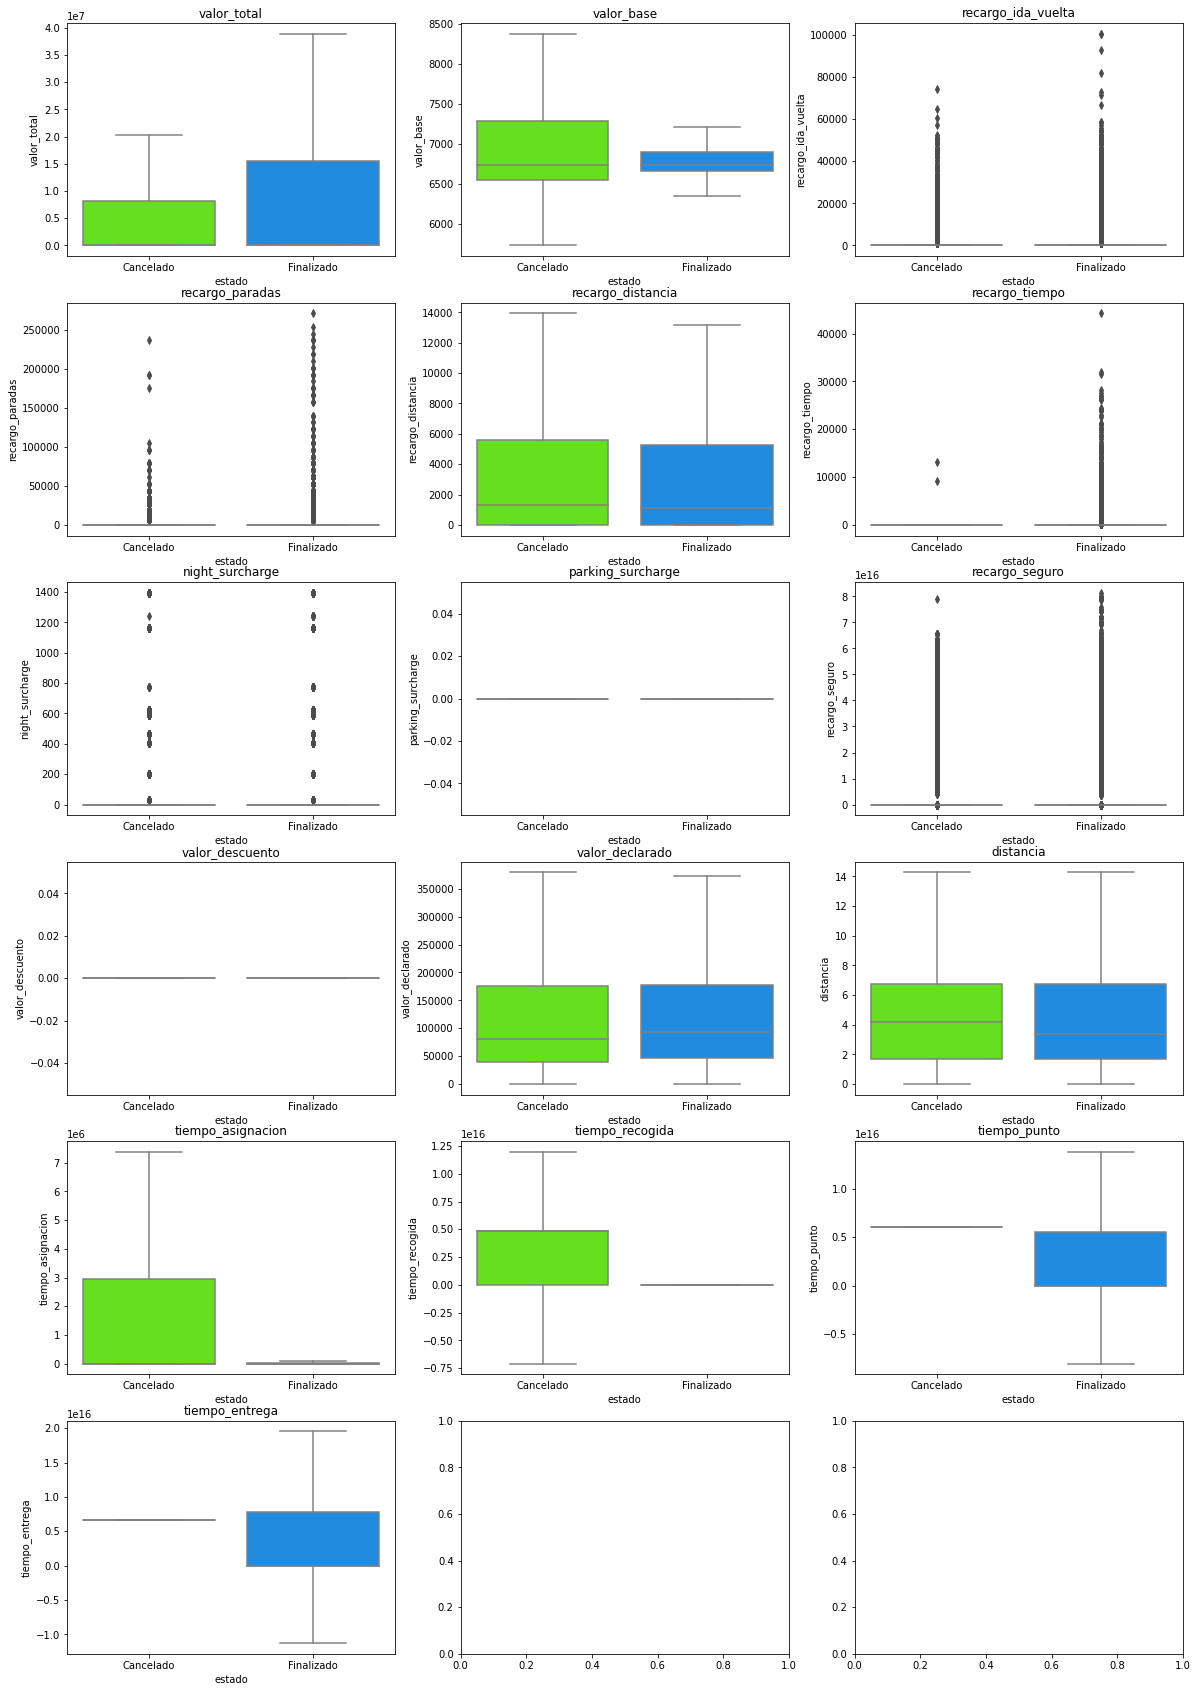

In [ ]:
# Create list of features
vars_to_look = ['valor_total', 'valor_base', 'recargo_ida_vuelta','recargo_paradas', 'recargo_distancia',
                'recargo_tiempo', 'night_surcharge', "parking_surcharge", 'recargo_seguro', 'valor_descuento',
                'valor_declarado', 'distancia', 'tiempo_asignacion', 'tiempo_recogida', 'tiempo_punto',
                'tiempo_entrega', 'tiempo_cliente']

# Define number of plots and size
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

sns.boxplot(ax=axes[0, 0], data=df2, y=vars_to_look[0], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[0])
sns.boxplot(ax=axes[0, 1], data=df2, y=vars_to_look[1], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[1])
sns.boxplot(ax=axes[0, 2], data=df2, y=vars_to_look[2], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[2])
sns.boxplot(ax=axes[1, 0], data=df2, y=vars_to_look[3], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[3])
sns.boxplot(ax=axes[1, 1], data=df2, y=vars_to_look[4], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[4])
sns.boxplot(ax=axes[1, 2], data=df2, y=vars_to_look[5], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[5])
sns.boxplot(ax=axes[2, 0], data=df2, y=vars_to_look[6], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[6])
sns.boxplot(ax=axes[2, 1], data=df2, y=vars_to_look[7], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[7])
sns.boxplot(ax=axes[2, 2], data=df2, y=vars_to_look[8], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[8])
sns.boxplot(ax=axes[3, 0], data=df2, y=vars_to_look[9], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[9])
sns.boxplot(ax=axes[3, 1], data=df2, y=vars_to_look[10], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[10])
sns.boxplot(ax=axes[3, 2], data=df2, y=vars_to_look[11], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[11])
sns.boxplot(ax=axes[4, 0], data=df2, y=vars_to_look[12], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[12])
sns.boxplot(ax=axes[4, 1], data=df2, y=vars_to_look[13], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[13])
sns.boxplot(ax=axes[4, 2], data=df2, y=vars_to_look[14], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[14])
sns.boxplot(ax=axes[5, 0], data=df2, y=vars_to_look[15], x='estado', palette="gist_rainbow", showfliers=False, **PROPS).set_title(vars_to_look[15])

When categorical variables are checked by "state":

- The value of those canceled are lower, despite having a similar mean in the base value.
- Higher values could be related with stops, time and round trip surcharge for completed services.
- The "distance top-up" has a higher maximum for canceled services, same as having a higher average of "distance".
- There is a larger time allocation for canceled services. Likewise, a greater dispersion of the collection time for canceled services.

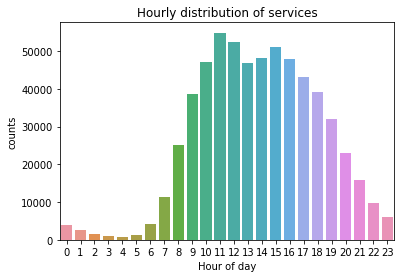

+-------+---------------+
|       |   hora_inicio |
|-------+---------------|
| count |  608001       |
| mean  |      13.7974  |
| std   |       4.19014 |
| min   |       0       |
| 25%   |      11       |
| 50%   |      14       |
| 75%   |      17       |
| max   |      23       |
+-------+---------------+


In [ ]:
# Plot service count by hour.

df0 = df2.copy()
df0["dia_inicio"] = df0.fecha_inicio.dt.day
df0["dia_inicio_name"] = df0.fecha_inicio.dt.day_name()

plot_dia_inicio =  ["dia_inicio_name", "Daily distribution of services", "Day of the week", "counts"]
plot_hora_inicio = ["hora_inicio", "Hourly distribution of services", "Hour of day", "counts"]
COL_NAME, TITLE, X_LABEL, Y_LABEL = plot_hora_inicio

ax = count_plot(df0, COL_NAME, TITLE, X_LABEL, Y_LABEL)
plt.show()

df_print = pd.DataFrame(df0[COL_NAME].describe())
pretty_print(df_print)

There is a greater flow of services between 10 am and 5 pm.

## **Contingency Tables**

In [ ]:
# Exploring the vehicle distribution by state
contingency_table = pd.crosstab(df2["vehiculo"], df2["estado"], normalize="index")
contingency_table

estado,Cancelado,Finalizado
vehiculo,,
Automovil/Van/Camioneta,0.056164,0.943836
Bicicleta,0.038959,0.961041
Motocicleta,0.037710,0.962290
Van,0.033868,0.966132


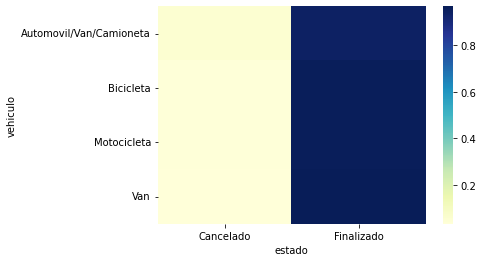

In [ ]:
sns.heatmap(contingency_table,cmap='YlGnBu')

There is an important imbalance for state, so its necessary to apply an equalization method. We choose the undersampling method (random data selection for highest category) for the finished state.

# **Data Skeweness**

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('Finalizado', round(df2['estado'].value_counts()[0]/len(df2) * 100,2), '% of the dataset')
print('Cancelado', round(df2['estado'].value_counts()[1]/len(df2) * 100,2), '% of the dataset')

Finalizado 96.19 % of the dataset
Cancelado 3.81 % of the dataset


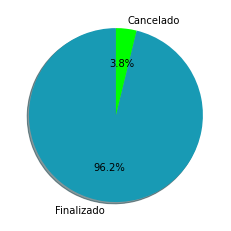

In [ ]:
colors = ['#189AB4','#00FF00']
plt.pie(df2.estado.value_counts().values, labels = df2.estado.value_counts().index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## **Undersampling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Finalizado', round(df2['estado'].value_counts()[0]/len(df2) * 100,2), '% of the dataset')
print('Cancelado', round(df2['estado'].value_counts()[1]/len(df2) * 100,2), '% of the dataset')

X = df2.drop('estado', axis=1)
y = df2['estado']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Finalizado 96.19 % of the dataset
Cancelado 3.81 % of the dataset
Train: [121568 121569 121570 ... 607998 607999 608000] Test: [     0      1      2 ... 121969 121972 121974]
Train: [     0      1      2 ... 607998 607999 608000] Test: [121568 121569 121570 ... 254185 254200 254229]
Train: [     0      1      2 ... 607998 607999 608000] Test: [242806 242807 242808 ... 378713 378782 378817]
Train: [     0      1      2 ... 607998 607999 608000] Test: [364278 364279 364280 ... 493489 493494 493508]
Train: [     0      1      2 ... 493489 493494 493508] Test: [486051 486052 486053 ... 607998 607999 608000]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.03814959 0.96185041]
[0.03814145 0.96185855]


In [ ]:
# Since our classes are highly skewed we should make them equivalent.

# Lets shuffle the data before creating the subsamples
df2 = df2.sample(frac=1)
valor = df2.estado.value_counts()[1]

# amount of 'cancelado'
cancel_df = df2.loc[df2['estado'] == 'Cancelado'][:valor]
non_cancel_df = df2.loc[df2['estado'] == 'Finalizado'][:valor]

normal_distributed_df = pd.concat([cancel_df, non_cancel_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print(new_df.shape)
new_df.head()

(46388, 42)


,id_servicio,fecha_inicio,hora_inicio,id_resource,vehiculo,vip,id_cliente,cliente,segmento,tipo_pago,...,no_paradas,finalizado_fallido,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente,cumplimiento_promesa,industry,client type
456426,93547304.0,2021-07-02,20,1632424.0,Motocicleta,VIP Total,34idc,34cl,B2B,Datafono,...,4.0,1.0,8.400000e-02,5.739972e+06,6.011004e+15,6.591618e+15,7.881629e+15,0.0,Ind1,1
407193,94842816.0,2021-07-17,18,796388.0,Bicicleta,VIP Total,35idc,35cl,B2B,Datafono,...,3.0,0.0,9.802800e-02,2.940000e-01,1.286603e+07,2.345003e+07,3.670800e+04,1.0,Ind1,1
344314,94558732.0,2021-07-14,19,204044.0,Motocicleta,No VIP,58idc,58cl,B2B,Efectivo,...,2.0,1.0,2.940000e-01,4.805124e+15,6.011004e+15,6.591618e+15,7.881629e+15,0.0,Ind1,2
83306,95799664.0,2021-07-29,13,3054888.0,Bicicleta,No VIP,31idc,31cl,B2B,Pago on-line,...,2.0,1.0,3.219720e-01,2.673972e+06,5.558028e+15,7.392000e+03,1.594597e+07,1.0,Ind1,1
138176,96047804.0,2021-07-31,17,713236.0,Motocicleta,VIP Total,34idc,34cl,B2B,Pago on-line,...,3.0,1.0,7.755972e+06,8.763972e+15,9.338028e+06,1.556797e+07,4.142603e+16,1.0,Ind1,1


Cancelado     0.5
Finalizado    0.5
Name: estado, dtype: float64


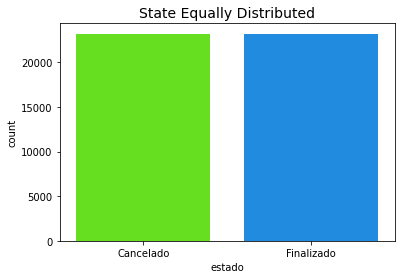

In [ ]:
print(new_df['estado'].value_counts()/len(new_df))
sns.countplot('estado', data=new_df, palette="gist_rainbow").set_title('State Equally Distributed', fontsize=14)
plt.show()

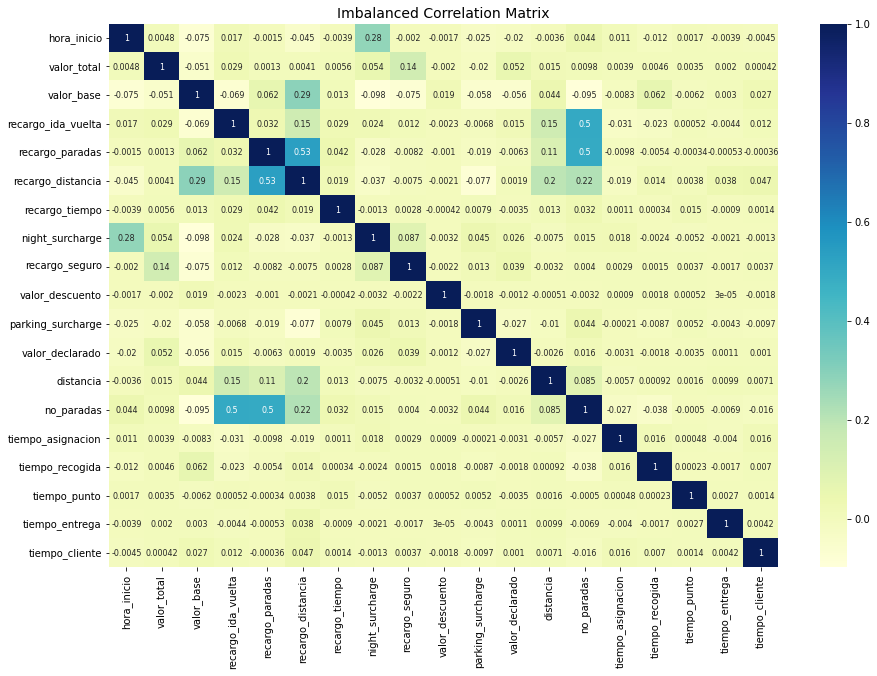

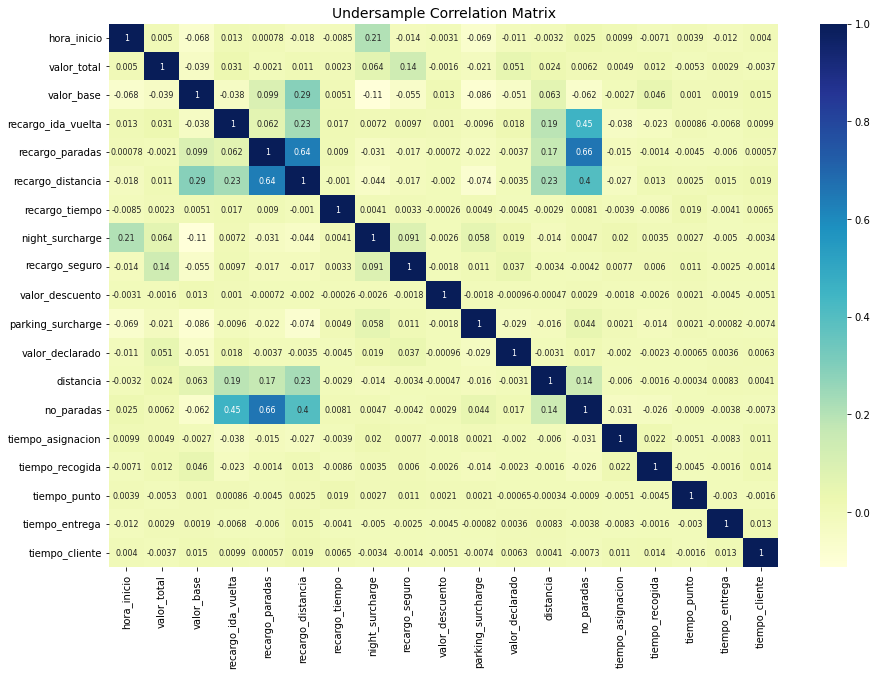

In [ ]:
# Entire DataFrame
corr = df2.drop(['ida_vuelta','lat','long','lat_2','long_2'], axis = 1).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':8}, annot = True).set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.figure(figsize=(15,10))
sub_sample_corr = new_df.drop(['ida_vuelta','lat','long','lat_2','long_2'], axis = 1).corr()
sns.heatmap(sub_sample_corr, cmap='YlGnBu', annot_kws={'size':8}, annot = True).set_title('Undersample Correlation Matrix', fontsize=14);

##**Exploring the Balanced Dataset**

###Numeric features

In [ ]:
# Statistical summary for the new dataframe
new_df.drop(['lat','long','lat_2','long_2'], axis = 1).describe()

,hora_inicio,valor_total,valor_base,recargo_ida_vuelta,recargo_paradas,recargo_distancia,recargo_tiempo,night_surcharge,recargo_seguro,valor_descuento,parking_surcharge,valor_declarado,distancia,no_paradas,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente
count,46388.000000,4.638800e+04,46388.000000,46388.000000,46388.000000,46388.000000,46388.000000,46388.000000,4.638800e+04,4.638800e+04,46388.000000,4.638800e+04,4.638800e+04,46388.000000,4.638800e+04,4.638800e+04,4.638800e+04,4.638800e+04,4.638800e+04
mean,13.930284,1.879433e+15,7118.380680,1097.681211,401.687171,4139.911399,11.220693,131.383116,2.296726e+15,1.887884e+11,192.377494,6.365168e+14,1.118738e+14,2.275912,2.276993e+15,4.708554e+15,5.990407e+15,6.586542e+15,7.912198e+15
std,4.509843,7.799001e+15,814.194135,3372.276772,3517.577820,10903.430321,323.241298,334.925716,8.369381e+15,4.066100e+13,710.497006,4.294105e+15,1.663298e+15,0.582171,8.267802e+15,1.161072e+16,1.004923e+16,9.517935e+15,1.005885e+16
min,0.000000,0.000000e+00,4495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,-6.133403e+16,-6.157200e+16,-6.041003e+16,1.959720e-01
25%,11.000000,8.215000e+03,6556.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.340000e+04,1.680000e+00,2.000000,2.799720e-01,1.890000e+00,3.416028e+06,1.346797e+07,2.988997e+07
50%,14.000000,1.402750e+04,6742.500000,0.000000,0.000000,1317.500000,0.000000,0.000000,1.550000e+02,0.000000e+00,0.000000,8.819500e+04,4.200000e+00,2.000000,6.159720e-01,5.012028e+06,6.011004e+15,6.591618e+15,7.881629e+15
75%,17.000000,1.061454e+07,7052.500000,0.000000,0.000000,5270.000000,0.000000,0.000000,9.165925e+04,0.000000e+00,0.000000,1.763900e+05,6.720000e+00,3.000000,1.484028e+06,4.805124e+15,6.011004e+15,6.591618e+15,7.881629e+15
max,23.000000,8.189270e+16,9765.000000,74400.000000,236452.500000,396800.000000,31620.000000,1395.000000,7.905542e+16,8.757516e+15,11625.000000,6.410645e+16,5.292000e+16,29.000000,7.980000e+16,7.980000e+16,7.980000e+16,7.980000e+16,7.980000e+16


From 608,001,000,000 rows in the original base, we go to 46,388,000,000 rows. Its relevant to check if the distribution of the data is similar for unbalanced dataset and the balanced undersample.

In [ ]:
# Comparative descriptives for unbalanced dataset and balanced unsersample
base0 = new_df.drop(['lat','long','lat_2','long_2'], axis = 1).describe().T[['mean']].rename(columns={'mean':'new_mean'})
base1 = df2.drop(['lat','long','lat_2','long_2'], axis = 1).describe().T[['mean']].rename(columns={'mean':'original_mean'})
base3 = pd.concat([base0,base1], axis = 1)
base3['diff_mean'] = abs(base3['original_mean'] - base3['new_mean'])
base3['std_orig'] = df2.drop(['lat','long','lat_2','long_2'], axis = 1).describe().T[['std']].rename(columns={'mean':'original_mean'})['std']
base3['diff_mean>std_orig'] = base3.apply(lambda x: 1 if x['diff_mean']>x['std_orig'] else 0, axis = 1)
base3


,new_mean,original_mean,diff_mean,std_orig,diff_mean>std_orig
hora_inicio,1.389709e+01,1.379735e+01,9.973150e-02,4.190136e+00,0
valor_total,1.883747e+15,2.128641e+15,2.448944e+14,8.501827e+15,0
valor_base,7.113775e+03,7.031936e+03,8.183908e+01,7.329388e+02,0
recargo_ida_vuelta,1.113155e+03,1.084692e+03,2.846362e+01,3.077080e+03,0
recargo_paradas,3.939094e+02,3.537477e+02,4.016178e+01,2.759356e+03,0
recargo_distancia,4.114379e+03,3.515891e+03,5.984887e+02,7.453040e+03,0
recargo_tiempo,1.220189e+01,2.215419e+01,9.952303e+00,4.157001e+02,0
night_surcharge,1.303957e+02,1.402428e+02,9.847037e+00,3.475434e+02,0
recargo_seguro,2.273276e+15,2.430913e+15,1.576373e+14,8.556861e+15,0
valor_descuento,4.778196e+11,6.493811e+11,1.715616e+11,8.249966e+13,0


Despite the sample sizes are different, the mean of the samples does not vary beyond the initial standard distribution.

In [ ]:
# Normality test for balnced sample
st1 = stats.shapiro(new_df.valor_total)
st2 = stats.shapiro(new_df.valor_base)
st3 = stats.shapiro(new_df.recargo_ida_vuelta)
st4 = stats.shapiro(new_df.recargo_distancia)
st5 = stats.shapiro(new_df.recargo_tiempo)
st6 = stats.shapiro(new_df.night_surcharge)
st7 = stats.shapiro(new_df.recargo_seguro)
st8 = stats.shapiro(new_df.valor_descuento)
st9 = stats.shapiro(new_df.parking_surcharge)
st10 = stats.shapiro(new_df.valor_declarado)
st11 = stats.shapiro(new_df.distancia)
st12 = stats.shapiro(new_df.no_paradas)
st13 = stats.shapiro(new_df.tiempo_asignacion)
st14 = stats.shapiro(new_df.tiempo_recogida)
st15 = stats.shapiro(new_df.tiempo_punto)
st16 = stats.shapiro(new_df.tiempo_entrega)
st17 = stats.shapiro(new_df.tiempo_cliente)

print(f"Variables normality test values:{st1},{st2},{st3},{st4},{st5},{st6},{st7},{st8},{st9},{st10},{st11},{st12},{st13},{st14},{st15},{st16},{st17}")

Variables normality test values:(0.2562425136566162, 0.0),(0.6739778518676758, 0.0),(0.3708339333534241, 0.0),(0.31943321228027344, 0.0),(0.01745659112930298, 0.0),(0.4371657371520996, 0.0),(0.3056653141975403, 0.0),(0.0007685422897338867, 0.0),(0.29864293336868286, 0.0),(0.13432127237319946, 0.0),(0.044578373432159424, 0.0),(0.4280562996864319, 0.0),(0.3114593029022217, 0.0),(0.4460476040840149, 0.0),(0.5309923887252808, 0.0),(0.5608001947402954, 0.0),(0.6479262113571167, 0.0)


Initially, a non-normality of the data was assumed, and is the same case for our balanced dataframe.

###Categoric features

In [ ]:
# Distribution by categories
df_ = new_df.copy()
for col_name in categorical_columns:
    df_print = pd.DataFrame(round(df_[col_name].value_counts(normalize=True)*100))
    df_print.columns = [" '{}' distribution %".format(col_name)]
    pretty_print(df_print)

+-------------------------+------------------------------+
|                         |    'vehiculo' distribution % |
|-------------------------+------------------------------|
| Motocicleta             |                           66 |
| Bicicleta               |                           34 |
| Automovil/Van/Camioneta |                            0 |
| Van                     |                            0 |
+-------------------------+------------------------------+
+----------------+-------------------------+
|                |    'vip' distribution % |
|----------------+-------------------------|
| No VIP         |                      63 |
| VIP Total      |                      34 |
| VIP Mensajeria |                       2 |
| VIP Domicilios |                       1 |
+----------------+-------------------------+
+-----+------------------------------+
|     |    'segmento' distribution % |
|-----+------------------------------|
| B2B |                           87 |
| B2C |     

Categories distribution comparison for unbalanced dataset and blanced unsersample

In [ ]:
# Create categories distribution for the new dataframe
df_ = new_df.copy()

base0 = pd.DataFrame(round(df_['vehiculo'].value_counts(normalize=True)*100))
base0 = pd.melt(base0.reset_index(), id_vars = 'index')

for col_name in categorical_columns[1:]:
    df_print = pd.DataFrame(round(df_[col_name].value_counts(normalize=True)*100))
    df_print = pd.melt(df_print.reset_index(), id_vars = 'index')
    base0 = pd.concat([base0,df_print], axis = 0)

In [ ]:
# Create categories distribution for the original dataframe
df_ = df2.copy()

base1 = pd.DataFrame(round(df_['vehiculo'].value_counts(normalize=True)*100))
base1 = pd.melt(base1.reset_index(), id_vars = 'index')

for col_name in categorical_columns[1:]:
    df_print = pd.DataFrame(round(df_[col_name].value_counts(normalize=True)*100))
    df_print = pd.melt(df_print.reset_index(), id_vars = 'index')
    base1 = pd.concat([base1,df_print], axis = 0)

In [ ]:
# Merge the two dataframes
df0 = pd.merge(base0, base1, how = 'left', on = ['variable','index']).rename(columns={'index':'categoria',
                                                                                'value_x':'new_df',
                                                                               'value_y':'df2'})
df0['difference'] = df0['df2'] - df0['new_df']
df0

,categoria,variable,new_df,df2,difference
0,Motocicleta,vehiculo,66.0,66.0,0.0
1,Bicicleta,vehiculo,34.0,34.0,0.0
2,Automovil/Van/Camioneta,vehiculo,0.0,0.0,0.0
3,Van,vehiculo,0.0,0.0,0.0
4,No VIP,vip,63.0,60.0,-3.0
5,VIP Total,vip,34.0,37.0,3.0
6,VIP Mensajeria,vip,2.0,1.0,-1.0
7,VIP Domicilios,vip,1.0,1.0,0.0
8,B2B,segmento,87.0,91.0,4.0
9,B2C,segmento,13.0,9.0,-4.0


## **Contingency tables with balanced dataset for category features**

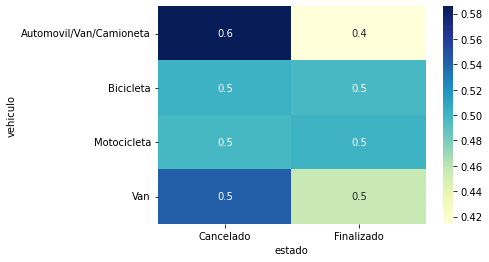

In [ ]:
#Vehiculo
contingency_table = pd.crosstab(new_df["vehiculo"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

There is an apparent relationship between the cancellation and the vehicle being a car/van/truck.






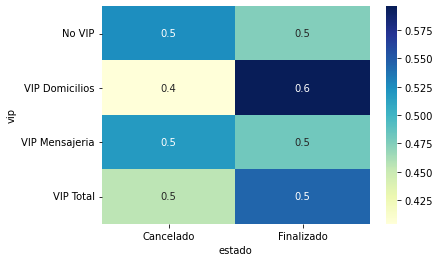

In [ ]:
#VIP 
contingency_table = pd.crosstab(new_df["vip"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

There is a lower probability that people cancel the service if they have domiciliosVIP

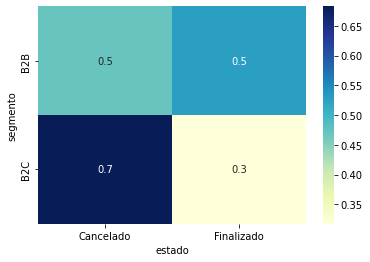

In [ ]:
#Segmento
contingency_table = pd.crosstab(new_df["segmento"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

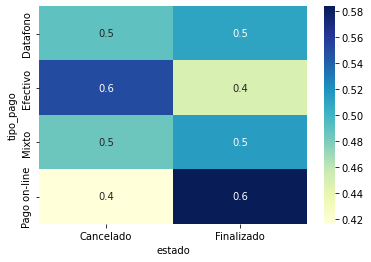

In [ ]:
# tipo_pago
contingency_table = pd.crosstab(new_df["tipo_pago"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

There is a lower probability that people cancel the service if they have pay in advance online

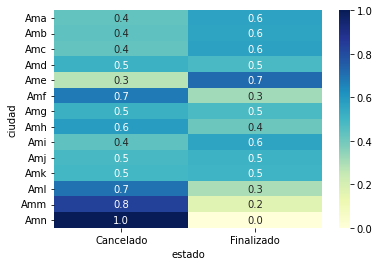

In [ ]:
# ciudad
contingency_table = pd.crosstab(new_df["ciudad"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

it is not clear what this category refers to, but it may be relevant to the model

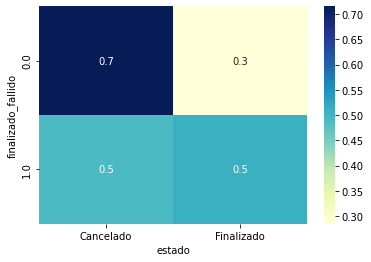

In [ ]:
# finalizado_fallido
contingency_table = pd.crosstab(new_df["finalizado_fallido"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

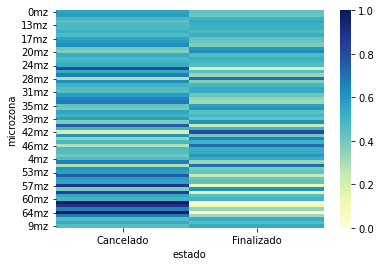

In [ ]:
# microzona 
contingency_table = pd.crosstab(new_df["microzona"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu");

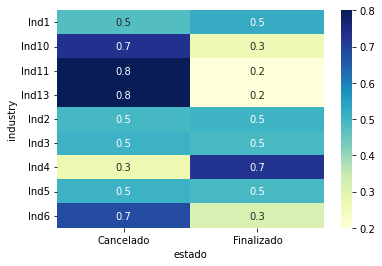

In [ ]:
# industry 
contingency_table = pd.crosstab(new_df["industry"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

There is an upper probability that people cancel the service is for 19,11,13 an 6 industries.

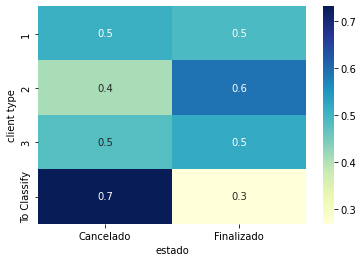

In [ ]:
# client type 
contingency_table = pd.crosstab(new_df["client type"], new_df["estado"], normalize="index")
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, fmt='.1f');

Text(0.5, 1.0, 'tiempo_entrega')

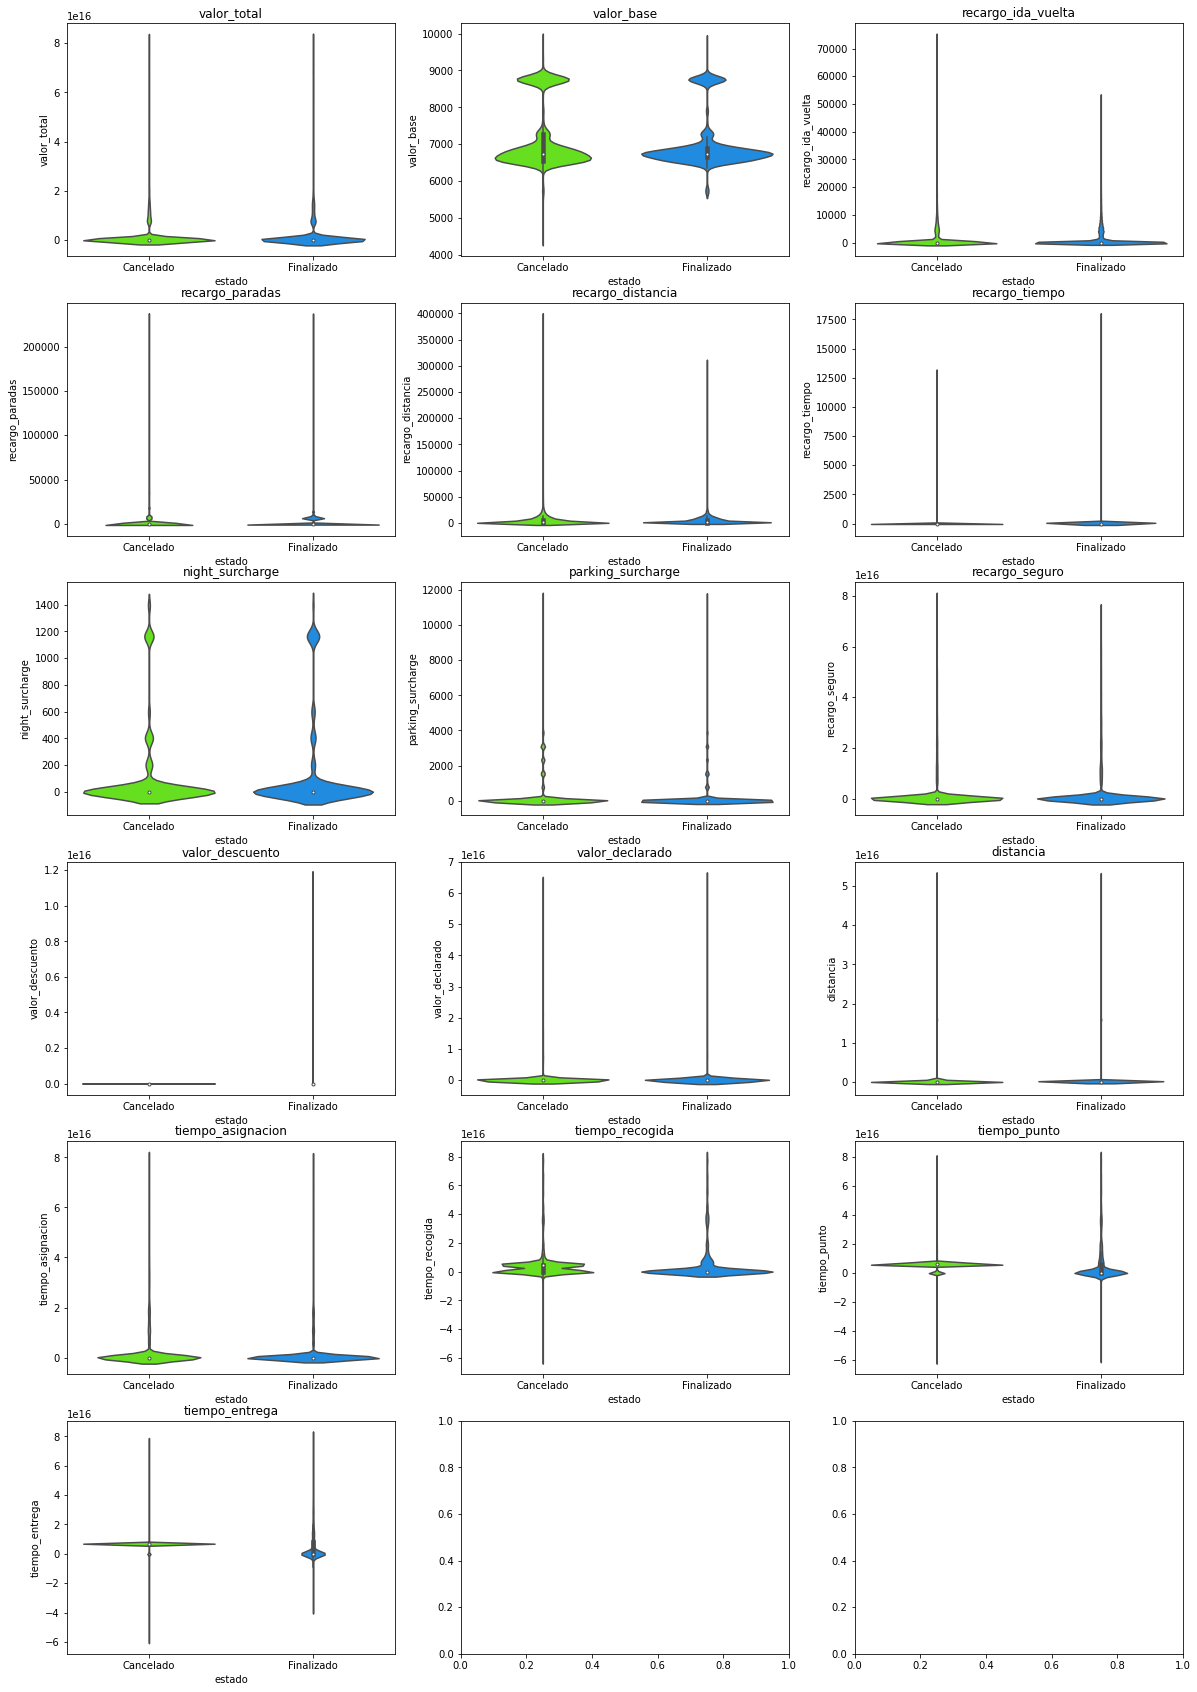

In [ ]:
# View the distribution of the numeric features after we balance the dataframe.

# create a list with numeric features:
vars_to_look = ['valor_total', 'valor_base', 'recargo_ida_vuelta','recargo_paradas', 'recargo_distancia',
                'recargo_tiempo', 'night_surcharge', "parking_surcharge", 'recargo_seguro', 'valor_descuento',
                'valor_declarado', 'distancia', 'tiempo_asignacion', 'tiempo_recogida', 'tiempo_punto',
                'tiempo_entrega', 'tiempo_cliente']

# define number of plots and size
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# create all the plots
sns.violinplot(ax=axes[0, 0], data=new_df, y=vars_to_look[0], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[0])
sns.violinplot(ax=axes[0, 1], data=new_df, y=vars_to_look[1], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[1])
sns.violinplot(ax=axes[0, 2], data=new_df, y=vars_to_look[2], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[2])
sns.violinplot(ax=axes[1, 0], data=new_df, y=vars_to_look[3], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[3])
sns.violinplot(ax=axes[1, 1], data=new_df, y=vars_to_look[4], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[4])
sns.violinplot(ax=axes[1, 2], data=new_df, y=vars_to_look[5], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[5])
sns.violinplot(ax=axes[2, 0], data=new_df, y=vars_to_look[6], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[6])
sns.violinplot(ax=axes[2, 1], data=new_df, y=vars_to_look[7], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[7])
sns.violinplot(ax=axes[2, 2], data=new_df, y=vars_to_look[8], x='estado', palette="gist_rainbow", **PROPS).set_title(vars_to_look[8])
sns.violinplot(ax=axes[3, 0], data=new_df, y=vars_to_look[9], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[9])
sns.violinplot(ax=axes[3, 1], data=new_df, y=vars_to_look[10], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[10])
sns.violinplot(ax=axes[3, 2], data=new_df, y=vars_to_look[11], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[11])
sns.violinplot(ax=axes[4, 0], data=new_df, y=vars_to_look[12], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[12])
sns.violinplot(ax=axes[4, 1], data=new_df, y=vars_to_look[13], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[13])
sns.violinplot(ax=axes[4, 2], data=new_df, y=vars_to_look[14], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[14])
sns.violinplot(ax=axes[5, 0], data=new_df, y=vars_to_look[15], x='estado', palette="gist_rainbow",showfliers=False, **PROPS).set_title(vars_to_look[15])

# **Features selection**

In this phase we need to use the subsample created in order to have an equal amount of "cancelado" and "finalizado" cases, helping our model better understand patterns that determines the the probability that a service can be canceled.

In [ ]:
modeldf = new_df.copy()

The variable "tipo_cancelado" is deleted because it more than 90% are NaN.

In [ ]:
modeldf = modeldf.drop(columns=["tipo_cancelado"])

The variable "cumplimiento_promesa" is deleted becausethe frecuency or categories is diferent in our balanced dataset.

In [ ]:
modeldf = modeldf.drop(columns=["cumplimiento_promesa"])

The distribution of car vehicule have a minimum representation in our data, same for categories of "vip" and "finalizado_fallido".

In [ ]:
modeldf = modeldf.drop(columns=["vehiculo"])
modeldf = modeldf.drop(columns=["vip"])
modeldf = modeldf.drop(columns=["finalizado_fallido"])

There are some irrelevant variables for the model like id_servicio, id_resource, id_cliente y cliente.

In [ ]:
modeldf = modeldf.drop(columns=["id_servicio","id_resource","id_cliente", "cliente"])

There is not visible distribution patterns  in "recargo_ida_vuelta", "recargo_paradas", "recargo_tiempo", "night_surcharge", "parking_surcharge" or "valor_descuento".

In [ ]:
modeldf = modeldf.drop(columns=["recargo_ida_vuelta","recargo_paradas","recargo_tiempo","night_surcharge","valor_descuento","parking_surcharge"])

We deleted the geograhpyc variables because we have another variables for it (segmento, microzona, ciudad), that are more relevant.

In [ ]:
modeldf = modeldf.drop(columns=["lat","long","lat_2","long_2","address"])

We take the day of the week and the day of the month, and delete the 'fecha_inicio".

In [ ]:
modeldf['day_week'] = modeldf.fecha_inicio.dt.strftime('%a')
modeldf['day_month'] = modeldf.fecha_inicio.dt.day.astype("category")
modeldf = modeldf.drop(columns=['fecha_inicio'])

## **Anomaly detection**
We can't delete outliers, because most of our data has outliers

In [ ]:
"""
# Rango Intercuartilico
modeldf2 = modeldf.copy()

lista =  modeldf.columns[(modeldf.dtypes =='float64')|(modeldf.dtypes =='int64')].to_list()

for i in lista:
    Q1= df2[i].quantile(0.005)
    Q3= df2[i].quantile(0.005)
    IQR=Q3-Q1 # rango intercuartílico
    
    modeldf2 = modeldf2[(modeldf2[i] > (Q1 - 1.5 * IQR)) & (modeldf2[i] < (Q3 + 1.5 * IQR))] # filtrar los que cumplen
  """

In [ ]:
"""
print(modeldf.shape)
print(modeldf2.shape)

(46388, 126)
(0, 126)


In [ ]:
"""
# Z-Score

modeldf2 = modeldf.copy()

lista =  modeldf.columns[(modeldf.dtypes =='float64')|(modeldf.dtypes =='int64')].to_list()

#calcular estadísticos
df_mean = np.mean(df2['Population'])
df_std = np.std(df2['Population'])

# identificar valores atípicos
cut_off = df_std*3
lim_inf = df_mean - cut_off
lim_sup = df_mean + cut_off

df2[(df2['Population']> lim_inf) & (df2['Population']< lim_sup)] 

## **Scaling**

In [ ]:
# Scaling packages
from sklearn.preprocessing import StandardScaler

# list of numeric variables
float_list = modeldf.columns[(modeldf.dtypes =='float64')|(modeldf.dtypes =='int64')].to_list()

# assign escalation type
scaler = StandardScaler()

# applying transformation
sv = scaler.fit_transform(modeldf[float_list]) 
modeldf[float_list] = sv

In [ ]:
modeldf.dtypes

hora_inicio           float64
segmento             category
tipo_pago            category
ciudad               category
microzona            category
ida_vuelta               bool
valor_total           float64
valor_base            float64
recargo_distancia     float64
recargo_seguro        float64
valor_declarado       float64
distancia             float64
estado               category
no_paradas            float64
tiempo_asignacion     float64
tiempo_recogida       float64
tiempo_punto          float64
tiempo_entrega        float64
tiempo_cliente        float64
industry             category
client type          category
day_week               object
day_month            category
dtype: object

###**Final dataframe without transforming to dummies the categorical variables**

In [ ]:
pd.options.display.max_columns = 100
modeldf.head()

,hora_inicio,segmento,tipo_pago,ciudad,microzona,ida_vuelta,valor_total,valor_base,recargo_distancia,recargo_seguro,valor_declarado,distancia,estado,no_paradas,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente,industry,client type,day_week,day_month
456426,1.352362,B2B,Datafono,Amd,26mz,True,-0.243583,-0.689272,0.238039,-0.273057,-0.147165,-0.071913,Cancelado,2.917417,-0.27671,-0.404532,0.005853,-0.000588,0.004894,Ind1,1,Fri,2
407193,0.909176,B2B,Datafono,Amd,4mz,True,-0.243583,-0.459216,-0.014926,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,-0.404532,-0.598834,-0.692121,-0.780483,Ind1,1,Sat,17
344314,1.130769,B2B,Efectivo,Amb,3mz,False,-0.243583,-0.267502,-0.122115,-0.273057,-0.147165,-0.071913,Cancelado,-0.469214,-0.27671,0.012365,0.005853,-0.000588,0.004894,Ind1,2,Wed,14
83306,-0.198788,B2B,Pago on-line,Amd,9mz,False,-0.243583,-0.459216,-0.379368,-0.273057,-0.147165,-0.071913,Finalizado,-0.469214,-0.27671,-0.404532,-0.039715,-0.692121,-0.780483,Ind1,1,Thu,29
138176,0.687584,B2B,Pago on-line,Amd,4mz,True,-0.243583,-0.689272,-0.276467,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,0.355838,-0.598834,-0.692121,3.347476,Ind1,1,Sat,31


## **Categories binarization**

In [ ]:
modeldfbi=modeldf.copy() # create a copy of the dataframe

In [ ]:
modeldfbi.dtypes # view the types features

hora_inicio           float64
segmento             category
tipo_pago            category
ciudad               category
microzona            category
ida_vuelta               bool
valor_total           float64
valor_base            float64
recargo_distancia     float64
recargo_seguro        float64
valor_declarado       float64
distancia             float64
estado               category
no_paradas            float64
tiempo_asignacion     float64
tiempo_recogida       float64
tiempo_punto          float64
tiempo_entrega        float64
tiempo_cliente        float64
industry             category
client type          category
day_week               object
day_month            category
dtype: object

In [ ]:
# Define features to get dummies
lista = list(modeldfbi.columns[(modeldfbi.dtypes =='category')|(modeldfbi.dtypes =='object')])
lista.pop(4)

modeldfbi = pd.get_dummies(modeldfbi, columns=lista)
modeldfbi.head()

,hora_inicio,ida_vuelta,valor_total,valor_base,recargo_distancia,recargo_seguro,valor_declarado,distancia,estado,no_paradas,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente,segmento_B2B,segmento_B2C,tipo_pago_Datafono,tipo_pago_Efectivo,tipo_pago_Mixto,tipo_pago_Pago on-line,ciudad_Ama,ciudad_Amb,ciudad_Amc,ciudad_Amd,ciudad_Ame,ciudad_Amf,ciudad_Amg,ciudad_Amh,ciudad_Ami,ciudad_Amj,ciudad_Amk,ciudad_Aml,ciudad_Amm,ciudad_Amn,microzona_0mz,microzona_10mz,microzona_11mz,microzona_12mz,microzona_13mz,microzona_14mz,microzona_15mz,microzona_16mz,microzona_17mz,microzona_18mz,microzona_19mz,microzona_1mz,microzona_20mz,microzona_21mz,microzona_22mz,...,industry_Ind12,industry_Ind13,industry_Ind2,industry_Ind3,industry_Ind4,industry_Ind5,industry_Ind6,industry_Ind7,client type_1,client type_2,client type_3,client type_To Classify,day_week_Fri,day_week_Mon,day_week_Sat,day_week_Sun,day_week_Thu,day_week_Tue,day_week_Wed,day_month_1,day_month_2,day_month_3,day_month_4,day_month_5,day_month_6,day_month_7,day_month_8,day_month_9,day_month_10,day_month_11,day_month_12,day_month_13,day_month_14,day_month_15,day_month_16,day_month_17,day_month_18,day_month_19,day_month_20,day_month_21,day_month_22,day_month_23,day_month_24,day_month_25,day_month_26,day_month_27,day_month_28,day_month_29,day_month_30,day_month_31
456426,1.352362,True,-0.243583,-0.689272,0.238039,-0.273057,-0.147165,-0.071913,Cancelado,2.917417,-0.27671,-0.404532,0.005853,-0.000588,0.004894,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407193,0.909176,True,-0.243583,-0.459216,-0.014926,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,-0.404532,-0.598834,-0.692121,-0.780483,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
344314,1.130769,False,-0.243583,-0.267502,-0.122115,-0.273057,-0.147165,-0.071913,Cancelado,-0.469214,-0.27671,0.012365,0.005853,-0.000588,0.004894,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83306,-0.198788,False,-0.243583,-0.459216,-0.379368,-0.273057,-0.147165,-0.071913,Finalizado,-0.469214,-0.27671,-0.404532,-0.039715,-0.692121,-0.780483,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
138176,0.687584,True,-0.243583,-0.689272,-0.276467,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,0.355838,-0.598834,-0.692121,3.347476,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###**Final dataframe with dummies**

In [ ]:
pd.options.display.max_columns = 100
modeldfbi.head() # view of the dataframe

,hora_inicio,ida_vuelta,valor_total,valor_base,recargo_distancia,recargo_seguro,valor_declarado,distancia,estado,no_paradas,tiempo_asignacion,tiempo_recogida,tiempo_punto,tiempo_entrega,tiempo_cliente,segmento_B2B,segmento_B2C,tipo_pago_Datafono,tipo_pago_Efectivo,tipo_pago_Mixto,tipo_pago_Pago on-line,ciudad_Ama,ciudad_Amb,ciudad_Amc,ciudad_Amd,ciudad_Ame,ciudad_Amf,ciudad_Amg,ciudad_Amh,ciudad_Ami,ciudad_Amj,ciudad_Amk,ciudad_Aml,ciudad_Amm,ciudad_Amn,microzona_0mz,microzona_10mz,microzona_11mz,microzona_12mz,microzona_13mz,microzona_14mz,microzona_15mz,microzona_16mz,microzona_17mz,microzona_18mz,microzona_19mz,microzona_1mz,microzona_20mz,microzona_21mz,microzona_22mz,...,industry_Ind12,industry_Ind13,industry_Ind2,industry_Ind3,industry_Ind4,industry_Ind5,industry_Ind6,industry_Ind7,client type_1,client type_2,client type_3,client type_To Classify,day_week_Fri,day_week_Mon,day_week_Sat,day_week_Sun,day_week_Thu,day_week_Tue,day_week_Wed,day_month_1,day_month_2,day_month_3,day_month_4,day_month_5,day_month_6,day_month_7,day_month_8,day_month_9,day_month_10,day_month_11,day_month_12,day_month_13,day_month_14,day_month_15,day_month_16,day_month_17,day_month_18,day_month_19,day_month_20,day_month_21,day_month_22,day_month_23,day_month_24,day_month_25,day_month_26,day_month_27,day_month_28,day_month_29,day_month_30,day_month_31
456426,1.352362,True,-0.243583,-0.689272,0.238039,-0.273057,-0.147165,-0.071913,Cancelado,2.917417,-0.27671,-0.404532,0.005853,-0.000588,0.004894,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
407193,0.909176,True,-0.243583,-0.459216,-0.014926,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,-0.404532,-0.598834,-0.692121,-0.780483,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
344314,1.130769,False,-0.243583,-0.267502,-0.122115,-0.273057,-0.147165,-0.071913,Cancelado,-0.469214,-0.27671,0.012365,0.005853,-0.000588,0.004894,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83306,-0.198788,False,-0.243583,-0.459216,-0.379368,-0.273057,-0.147165,-0.071913,Finalizado,-0.469214,-0.27671,-0.404532,-0.039715,-0.692121,-0.780483,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
138176,0.687584,True,-0.243583,-0.689272,-0.276467,-0.273057,-0.147165,-0.071913,Finalizado,1.224102,-0.27671,0.355838,-0.598834,-0.692121,3.347476,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#**Download final dataframes**

In [ ]:
df2.to_csv("/content/drive/MyDrive/CorrelationOneProyect/Archivos Finales/FullDF.csv", sep=";",index=False)
modeldf.to_csv("/content/drive/MyDrive/CorrelationOneProyect/Archivos Finales/MODELDF.csv", sep=";",index=False)
modeldfbi.to_csv("/content/drive/MyDrive/CorrelationOneProyect/Archivos Finales/MODELDFBI.csv", sep=";",index=False)